<div style="padding:15px;color:white;margin:0;font-size:200%;font-family:Arial, sans-serif;text-align:center;display:block;border-radius:15px;background-color: #003366;letter-spacing:2px;box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <b>CREDIT CARD APPROVAL PREDICTION</b>
</div>


<div style="text-align: center; padding: 30px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; background-color: #ffffff; border-radius: 12px; border: 1px solid #e1e1e1; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); max-width: 600px; margin: auto;">
  <p style="font-size: 20px; color: #333; margin: 0 0 10px;">
   
  </p>

  <div>
    <a href="https://www.linkedin.com/in/nirmalcv/" style="color: #0077b5; text-decoration: none; font-weight: bold; margin: 0 15px; font-size: 18px;">LinkedIn</a> | 
    <a href="https://github.com/Nirmal-Sarkar" style="color: #333; text-decoration: none; font-weight: bold; margin: 0 15px; font-size: 18px;">GitHub</a>
  </div>
</div>


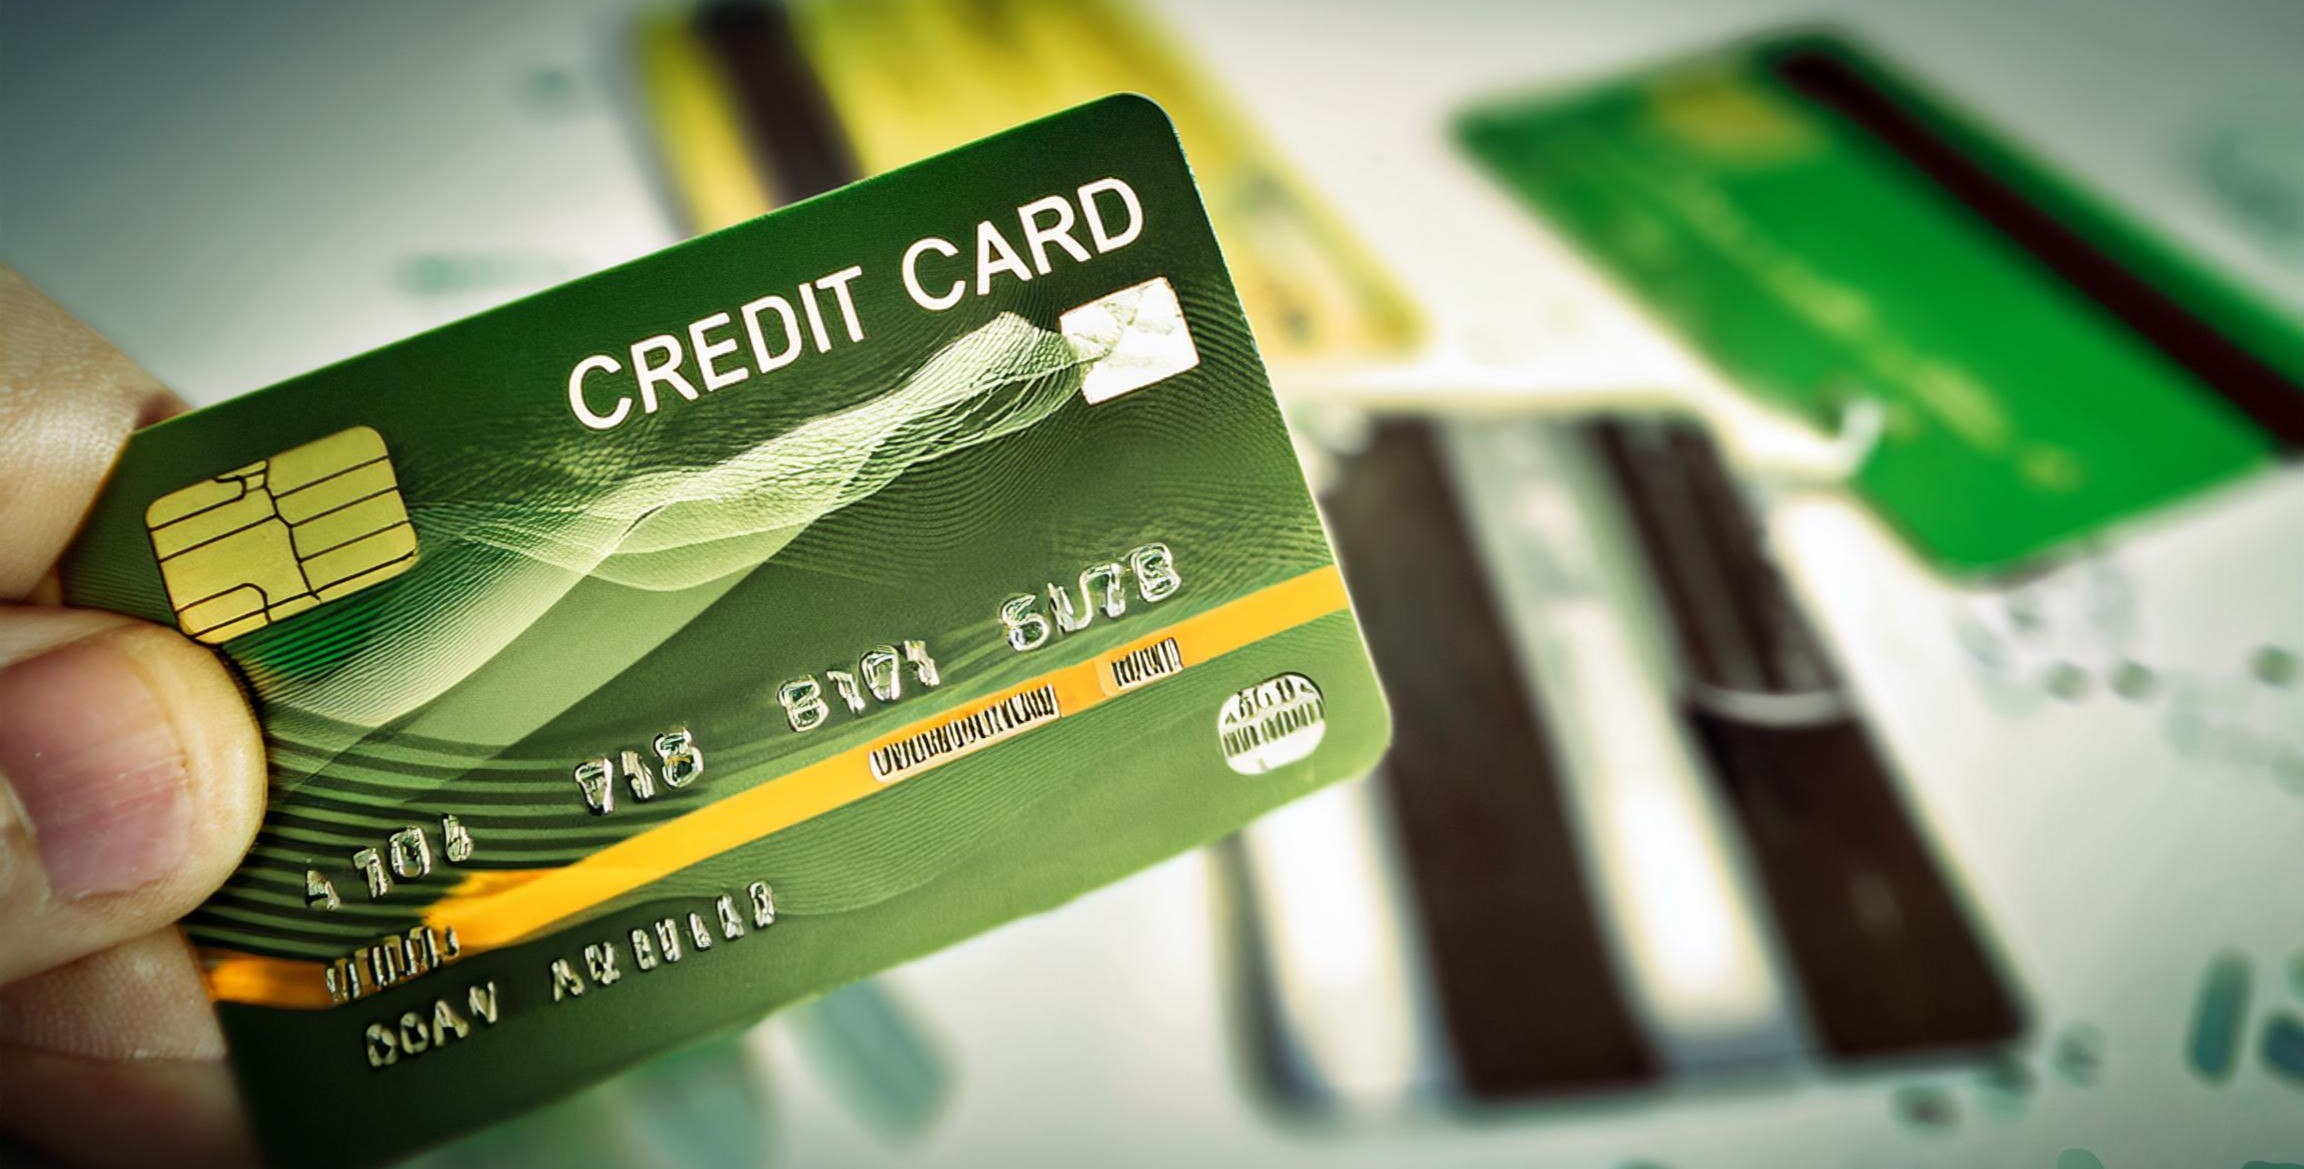

# <font color= blue > <b>Objectives of the study </b><font color= #FF0000>


The goal of this assignment is to assist the bank in minimizing risk and maximizing profit by making informed credit card approval decisions. To achieve this, we follow these steps:

1. **Data Cleaning**: Prepare the data by handling missing values, correcting errors, and ensuring consistency.
2. **Exploratory Data Analysis (EDA)**: Explore the data to uncover patterns, relationships, and insights that are crucial for decision-making.
3. **Feature Engineering**: Create and refine features to enhance model performance and better capture applicant characteristics.
4. **Model Selection**: Evaluate and choose the best machine learning model to predict creditworthiness based on the cleaned and engineered data.

These steps collectively help in making accurate and profitable credit card approval decisions.


# <font color= blue > <b>Dataset Description </b><font color= #FF0000>


| **Variable**         | **Description**                                                                                      |
|----------------------|------------------------------------------------------------------------------------------------------|
| `Ind_ID`             | Client ID                                                                                           |
| `Approval_status`    | Application outcome (0 = approved, 1 = rejected)                                                   |
| `Gender`             | Gender of the applicant                                                                            |
| `Car_owner`          | Indicates if the applicant owns a car (Yes/No)                                                      |
| `Property_owner`     | Indicates if the applicant owns property (Yes/No)                                                   |
| `Children`           | Number of children                                                                                  |
| `Annual_income`      | Applicant's annual income                                                                          |
| `Type_Income`        | Type of income (e.g., salary, investment)                                                           |
| `Education`          | Level of education (e.g., high school, bachelor’s degree)                                           |
| `Marital_status`     | Marital status (e.g., single, married)                                                              |
| `Housing_type`       | Type of housing (e.g., owned, rented)                                                               |
| `Birthday_count`     | Days since the last birthday (0 = today, -1 = yesterday)                                           |
| `Employed_days`      | Days since employment started (positive value indicates unemployment)                              |
| `Mobile_phone`       | Indicates if the applicant has a mobile phone (Yes/No)                                              |
| `Work_phone`         | Indicates if the applicant has a work phone (Yes/No)                                                |
| `Phone`              | Indicates if the applicant has any phone number (Yes/No)                                            |
| `EMAIL_ID`           | Indicates if the applicant has an email ID (Yes/No)                                                |
| `Type_Occupation`    | Type of occupation (e.g., managerial, clerical)                                                     |
| `Family_Members`     | Total number of family members                                                                      |

In [1]:
# <font color= blue > <b>Import Libraries and Data Review </b><font color= #FF0000>
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PowerTransformer, OneHotEncoder 
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import PrecisionRecallDisplay, roc_curve, average_precision_score, precision_recall_curve
from sklearn.metrics import RocCurveDisplay, roc_auc_score, auc
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

In [2]:
Credit_card = pd.read_excel(r"C:\Users\91829\Desktop\project\Credit_card_Original.xlsx")

In [3]:
df= Credit_card.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

# <font color= blue > <b> Data Cleaning </b><font color= #FF0000>


In [5]:
# Check for duplicates and remove if exists

def duplicate_remover(df):
    if df.duplicated().sum() == 0:
        print("There is no duplicate in this DATA")
    else:
        print(f"No of duplicated row in this DATA = {df.duplicated().sum()}")
        df = df.drop_duplicates(inplace=True)
        print("All Duplicated removed")
        
duplicate_remover(df)        

There is no duplicate in this DATA


In [6]:

def calculate_missing_values_proportion(df):
    # Calculate the proportion of missing values in each column
    missing_values_proportion = df.isnull().mean() * 100
    
    # Check if there are any missing values
    if missing_values_proportion.any():
        for column, proportion in missing_values_proportion.items():
            if proportion > 0:
                print(" ")
                print(f"The column '{column}' has {proportion:.2f}% missing values")
    else:
        print("There are no missing values in the DataFrame.")

calculate_missing_values_proportion(df)

 
The column 'GENDER' has 0.45% missing values
 
The column 'Annual_income' has 1.49% missing values
 
The column 'Birthday_count' has 1.42% missing values
 
The column 'Type_Occupation' has 31.52% missing values


## Instructions for Column Removal


1. **Remove the Column with High Missing Values**:
   - The "Type of occupation" column will be removed due to 31.54% missing values, which could potentially impact the quality of predictions.
   

2. **Exclude Unnecessary Columns**:
   - The columns "Mobile_phone," "Work_Phone," "Phone," and "EMAIL_ID" will be excluded as they are deemed unnecessary for the analysis.
   
   

In [7]:
df.drop(columns=['Mobile_phone','Work_Phone','Phone','EMAIL_ID', 'Type_Occupation'], inplace=True, axis=1)

## Variable Name Changes for Enhanced Clarity

1. **Renaming Variables**:
   - **"Birthday_count"** has been renamed to **"age"** for better clarity regarding the individual's age.
   - **"Employed_days"** has been renamed to **"employed_status"** to more accurately reflect the employment status of the individual.
   - **"Family_members"** has been renamed to **"family_size"** to clearly indicate the number of family members.

These changes have been made to improve the readability and understanding of the dataset.



In [8]:
df = df.rename(columns = {'Ind_ID' : 'id',
                          'GENDER' : 'gender', 
                          'Car_Owner': 'car_owner', 
                          'Propert_Owner' : 'propert_owner', 
                          'CHILDREN' : 'children', 
                          'Annual_income' : 'annual_income' , 
                          'Type_Income' : 'type_income', 
                          'EDUCATION': 'education',
                          'Marital_status' : 'marital_status',
                          'Housing_type': 'housing_type', 
                          'Birthday_count' : 'age',
                          'Employed_days' : 'employed_status', 
                          'Type_Occupation' : 'type_occupation' , 
                          'Family_Members' : 'family_size' , 
                          'Approved_status' : 'approval_status'})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1548 non-null   int64  
 1   gender           1541 non-null   object 
 2   car_owner        1548 non-null   object 
 3   propert_owner    1548 non-null   object 
 4   children         1548 non-null   int64  
 5   annual_income    1525 non-null   float64
 6   type_income      1548 non-null   object 
 7   education        1548 non-null   object 
 8   marital_status   1548 non-null   object 
 9   housing_type     1548 non-null   object 
 10  age              1526 non-null   float64
 11  employed_status  1548 non-null   int64  
 12  family_size      1548 non-null   int64  
 13  approval_status  1548 non-null   int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 169.4+ KB


In [10]:
# create a table with data missing 


def calculate_missing_values_proportion(df):
    # Calculate the proportion of missing values in each column
    missing_values_proportion = df.isnull().mean() * 100
    
    # Check if there are any missing values
    if missing_values_proportion.any():
        for column, proportion in missing_values_proportion.items():
            if proportion > 0:
                print(" ")
                print(f"The column '{column}' has {proportion:.2f}% missing values")
    else:
        print("There are no missing values in the DataFrame.")

calculate_missing_values_proportion(df)

 
The column 'gender' has 0.45% missing values
 
The column 'annual_income' has 1.49% missing values
 
The column 'age' has 1.42% missing values


In [11]:
def print_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        
        # Display column header and count of unique values
        print(f"\n{'-'*40}")
        print(f"Column: '{column}'")
        print(f"Number of Unique Values: {len(unique_values)}")
        
        # Print unique values or a sample if there are too many
        if len(unique_values) <= 10:
            print(f"Unique Values: {unique_values}")
        else:
            print("Unique Values Sample:")
            print(unique_values[:10], " ...")  # Display the first 10 unique values

print_unique_values(df)


----------------------------------------
Column: 'id'
Number of Unique Values: 1548
Unique Values Sample:
[5008827 5008865 5008889 5009000 5009023 5009053 5009074 5009118 5009146
 5009195]  ...

----------------------------------------
Column: 'gender'
Number of Unique Values: 3
Unique Values: ['M' 'F' nan]

----------------------------------------
Column: 'car_owner'
Number of Unique Values: 2
Unique Values: ['Y' 'N']

----------------------------------------
Column: 'propert_owner'
Number of Unique Values: 2
Unique Values: ['Y' 'N']

----------------------------------------
Column: 'children'
Number of Unique Values: 6
Unique Values: [ 0  2  1  3 14  4]

----------------------------------------
Column: 'annual_income'
Number of Unique Values: 116
Unique Values Sample:
[180000. 135000. 247500. 157500. 216000. 202500. 450000. 315000. 292500.
 337500.]  ...

----------------------------------------
Column: 'type_income'
Number of Unique Values: 4
Unique Values: ['Pensioner' 'Working' '

In [12]:
 def count_outliers(column):
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return len(column[(column < lower_bound) | (column > upper_bound)])

numerical_cols = df.select_dtypes(include=['int64','int32', 'float64']).columns.tolist()

    
for col in numerical_cols:
    if count_outliers(df[col]) > 0:
        print(" ")
        print(f"Columns: '{col}' has {count_outliers(df[col]) } outlier")

 
Columns: 'children' has 18 outlier
 
Columns: 'annual_income' has 73 outlier
 
Columns: 'employed_status' has 339 outlier
 
Columns: 'family_size' has 17 outlier
 
Columns: 'approval_status' has 175 outlier


## Data Quality Summary

- **Missing Values**:
  - **gender**: 0.45%
  - **annual_ncome**: 1.49%
  - **age**: 1.42%
  - **Type of Occupation**: 31.52% (high missing rate)

- **Outliers**:
  - **children**: 18
  - **annual_income**: 73
  - **employed_status**: 339
  - **family_ize**: 17

- **Data Corrections Needed**:
  - **education Column**: Simplify 'Secondary / secondary special' to 'Secondary education.'
  - **Marital Status Column**: Standardize 'Civil marriage' to 'Married' and 'Single / not married' to 'Unmarried.'
  - **age & employed_status**: Correct inappropriate values and adjust format and data type.

- **Additional Notes**:
  - **No Duplicates**: No duplicate records found.

## Next Steps:

1. Address missing values in affected columns.
2. Treat or remove outliers.
3. Implement data corrections and standardizations.

This summary provides an overview of key data issues and the actions required.

In [13]:
# Replacing values in the DataFrame
df["education"] = df["education"].replace(["Secondary / secondary special"], "Secondary education")

print(df['education'])

0          Higher education
1       Secondary education
2          Higher education
3       Secondary education
4          Higher education
               ...         
1543    Secondary education
1544    Secondary education
1545    Secondary education
1546    Secondary education
1547    Secondary education
Name: education, Length: 1548, dtype: object


In [14]:
def convert_negative_ages(df):
    df.loc[df['age'] < 0, 'age'] = (df.loc[df['age'] < 0, 'age'].abs() // 365)
    
convert_negative_ages(df)

print(df['age'])


0       51.0
1       43.0
2       46.0
3       27.0
4       42.0
        ... 
1543    35.0
1544    49.0
1545    64.0
1546    27.0
1547    60.0
Name: age, Length: 1548, dtype: float64


In [15]:
def update_employment_status(df):
    # Identify rows where the value is negative (employed)
    is_employed = df['employed_status'] < 0
    # Set status to 'Employed' for negative values
    df.loc[is_employed, 'employed_status'] = 'Employed'
    # Set status to 'Unemployed' for non-negative values
    df.loc[~is_employed, 'employed_status'] = 'Unemployed'

update_employment_status(df)

print(df['employed_status'])

0       Unemployed
1         Employed
2         Employed
3         Employed
4         Employed
           ...    
1543      Employed
1544      Employed
1545    Unemployed
1546      Employed
1547    Unemployed
Name: employed_status, Length: 1548, dtype: object


In [16]:
# Replacing values in the DataFrame
df["marital_status"] = df["marital_status"].replace(["Single / not married"], "Unmarried")
df["marital_status"] = df["marital_status"].replace(["Civil marriage"], "Married")

print(df['marital_status'])

0         Married
1         Married
2       Separated
3         Married
4         Married
          ...    
1543    Unmarried
1544      Married
1545        Widow
1546      Married
1547        Widow
Name: marital_status, Length: 1548, dtype: object


In [17]:
df["housing_type"] = df["housing_type"].replace(["House / apartment"], "House")

print(df['housing_type'])

0                     House
1                     House
2          Rented apartment
3                     House
4                     House
               ...         
1543           With parents
1544                  House
1545    Municipal apartment
1546                  House
1547                  House
Name: housing_type, Length: 1548, dtype: object


In [18]:
for column in df:
    unique_value=df[column].unique()
    print("------------------------------------")
    print(f'unique Value in {column}:',unique_value)
      

------------------------------------
unique Value in id: [5008827 5008865 5008889 ... 5150164 5150221 5150412]
------------------------------------
unique Value in gender: ['M' 'F' nan]
------------------------------------
unique Value in car_owner: ['Y' 'N']
------------------------------------
unique Value in propert_owner: ['Y' 'N']
------------------------------------
unique Value in children: [ 0  2  1  3 14  4]
------------------------------------
unique Value in annual_income: [ 180000.   135000.   247500.   157500.   216000.   202500.   450000.
  315000.   292500.   337500.   130500.   193500.    90000.   112500.
   45000.   225000.    99000.        nan  198000.    85500.   189000.
  121500.   166500.    58500.   270000.   472500.   126000.    40500.
  103500.   131400.   256500.    67500.   234000.   144000.   360000.
  119250.    83250.   274500.   175500.   495000.   184500.   148500.
  540000.    47250.   162000.   585000.   117000.   630000.    33750.
   81000.   108000.  

# <font color= blue > <b> Feature Engineering </b><font color= #FF0000>


### Dealing with Missing Values


Based on the provided information, it's evident that:
* The "gender," "annual_income," and "age" columns contain some NaN (missing) values.

In [19]:
df['age'].fillna(df['age'].median(), inplace = True) 

In [20]:
df['age'] = df['age'].astype(np.int64)

In [21]:
df = df.dropna(subset = 'gender')

In [22]:
df['annual_income'].fillna(df['annual_income'].mean(), inplace = True)

In [23]:
df.isnull().sum()

id                 0
gender             0
car_owner          0
propert_owner      0
children           0
annual_income      0
type_income        0
education          0
marital_status     0
housing_type       0
age                0
employed_status    0
family_size        0
approval_status    0
dtype: int64

In [24]:
# change the data type 

df['annual_income'] = df['annual_income'].astype(np.int64)
df['children'] = df['children'].astype(np.int64)
df['family_size'] = df['family_size'].astype(np.int64)
df['age'] = df['age'].astype(np.int64)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 1547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1541 non-null   int64 
 1   gender           1541 non-null   object
 2   car_owner        1541 non-null   object
 3   propert_owner    1541 non-null   object
 4   children         1541 non-null   int64 
 5   annual_income    1541 non-null   int64 
 6   type_income      1541 non-null   object
 7   education        1541 non-null   object
 8   marital_status   1541 non-null   object
 9   housing_type     1541 non-null   object
 10  age              1541 non-null   int64 
 11  employed_status  1541 non-null   object
 12  family_size      1541 non-null   int64 
 13  approval_status  1541 non-null   int64 
dtypes: int64(6), object(8)
memory usage: 180.6+ KB


#  Remove Outliers

We remove the outliers from `children`, `annual_income`, and `employed_status` using a box plot.

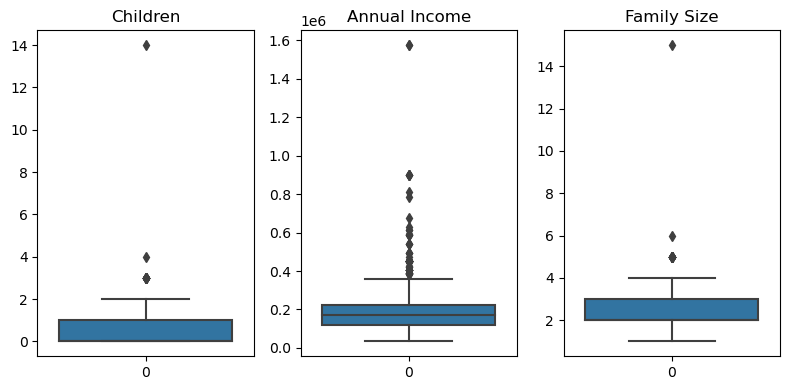

In [26]:

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))

# Boxplot for 'children'
sns.boxplot(data=df['children'], ax=axes[0])
axes[0].set_title('Children')

# Boxplot for 'annual_income'
sns.boxplot(data=df['annual_income'], ax=axes[1])
axes[1].set_title('Annual Income')

# Boxplot for 'family_size'
sns.boxplot(data=df['family_size'], ax=axes[2])
axes[2].set_title('Family Size')

# Adjust layout
plt.tight_layout()
plt.show()

In [27]:
# Calculate the quartiles and IQR
Q1 = np.percentile(df['children'], 25)
Q3 = np.percentile(df['children'], 75)
IQR = Q3 - Q1

# Define bounds for clipping
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

# Clip values to be within the bounds
df['children'] = df['children'].clip(lower=low_lim, upper=up_lim)

In [28]:
Q1 = np.percentile(df['annual_income'], 25)
Q3 = np.percentile(df['annual_income'], 75)
IQR = Q3 - Q1

# Define bounds for clipping
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

# Clip values to be within the bounds
df['annual_income'] = df['annual_income'].clip(lower=low_lim, upper=up_lim)

In [29]:
Q1 = np.percentile(df['family_size'], 25)
Q3 = np.percentile(df['family_size'], 75)
IQR = Q3 - Q1

# Define bounds for clipping
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

# Clip values to be within the bounds
df['family_size'] = df['family_size'].clip(lower=low_lim, upper=up_lim)

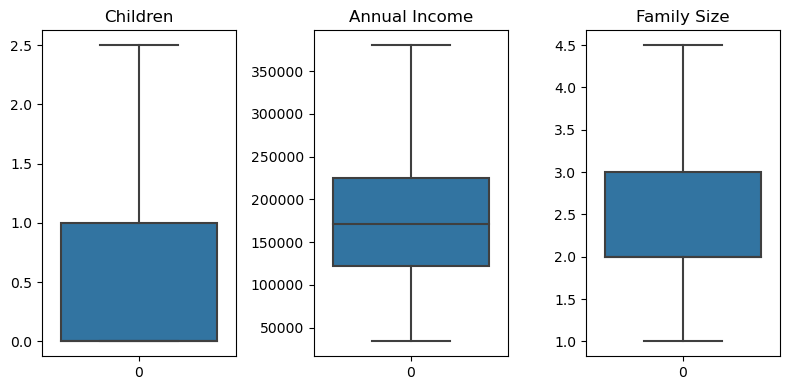

In [30]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))

# Boxplot for 'children'
sns.boxplot(data=df['children'], ax=axes[0])
axes[0].set_title('Children')

# Boxplot for 'annual_income'
sns.boxplot(data=df['annual_income'], ax=axes[1])
axes[1].set_title('Annual Income')

# Boxplot for 'family_size'
sns.boxplot(data=df['family_size'], ax=axes[2])
axes[2].set_title('Family Size')

# Adjust layout
plt.tight_layout()
plt.show()

### Handle missing values in the affected columns and address outliers appropriately.

### As a result, the dataset is now clean and ready for analysis.

# <font color= blue > <b>Univariate and Multivariate Analysis  </b><font color= #FF0000>


### 1. Univariate Analysis

Univariate analysis focuses on examining each feature individually to understand its distribution, central tendency, and variability.

#### 1.1 Categorical Features

For categorical features (e.g., gender, car_owner, property_owner, type_income, education, marital_status, housing_type, employed_status):



In [31]:
df['gender'].value_counts()

F    973
M    568
Name: gender, dtype: int64

In [32]:
df['car_owner'].value_counts()

N    922
Y    619
Name: car_owner, dtype: int64

In [33]:
df['propert_owner'].value_counts()

Y    1007
N     534
Name: propert_owner, dtype: int64

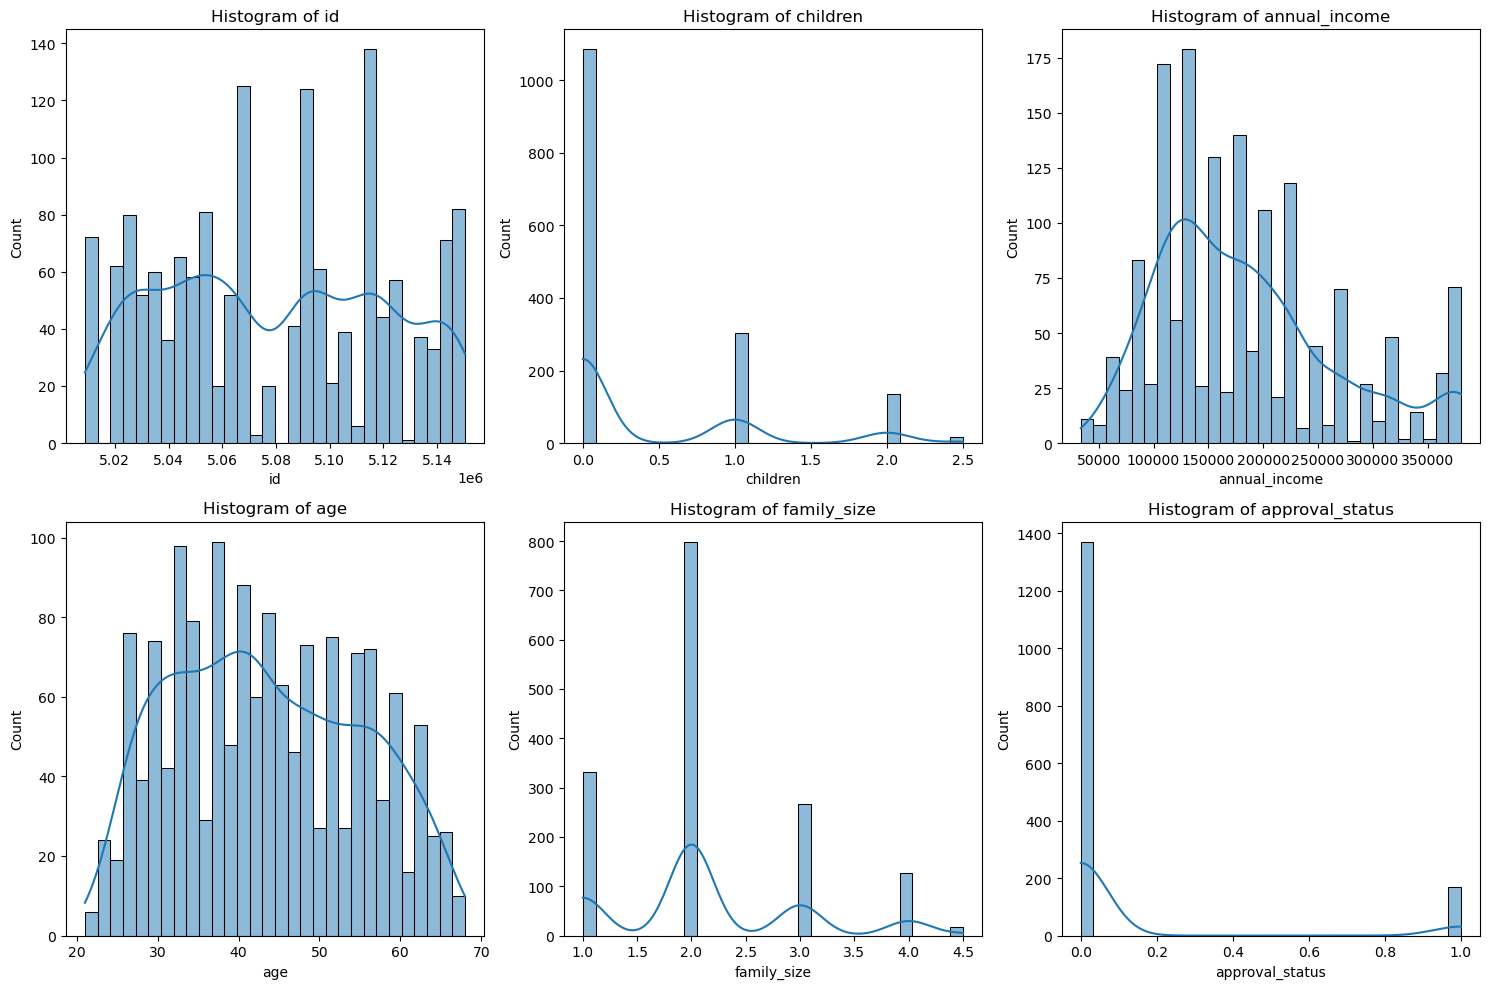

In [34]:
#    Plots histograms for all numerical columns in the DataFrame.
def plot_numerical_columns_histogram(df):

    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    num_cols = len(numerical_cols)
    num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed for 3 columns per row
    
    plt.figure(figsize=(15, 5 * num_rows))
    
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(num_rows, 3, i)
        sns.histplot(df[col].dropna(), kde=True, bins=30)
        plt.title(f'Histogram of {col}')
    
    plt.tight_layout()
    plt.show()
plot_numerical_columns_histogram(df)


### 2. Bivariate Analysis

Bivariate analysis investigates the relationships between pairs of variables, specifically focusing on how each feature relates to the target variable (approval_status).

#### 2.1 Categorical vs. Target (Approval_Status)

For categorical features:

- **Cross-Tabulation**:
  - Create a cross-tabulation to compare the counts of each category against the approval status.

- **Chi-Square Test**:
  - Perform a Chi-Square test to determine if there is a significant association between the categorical feature and the approval status.

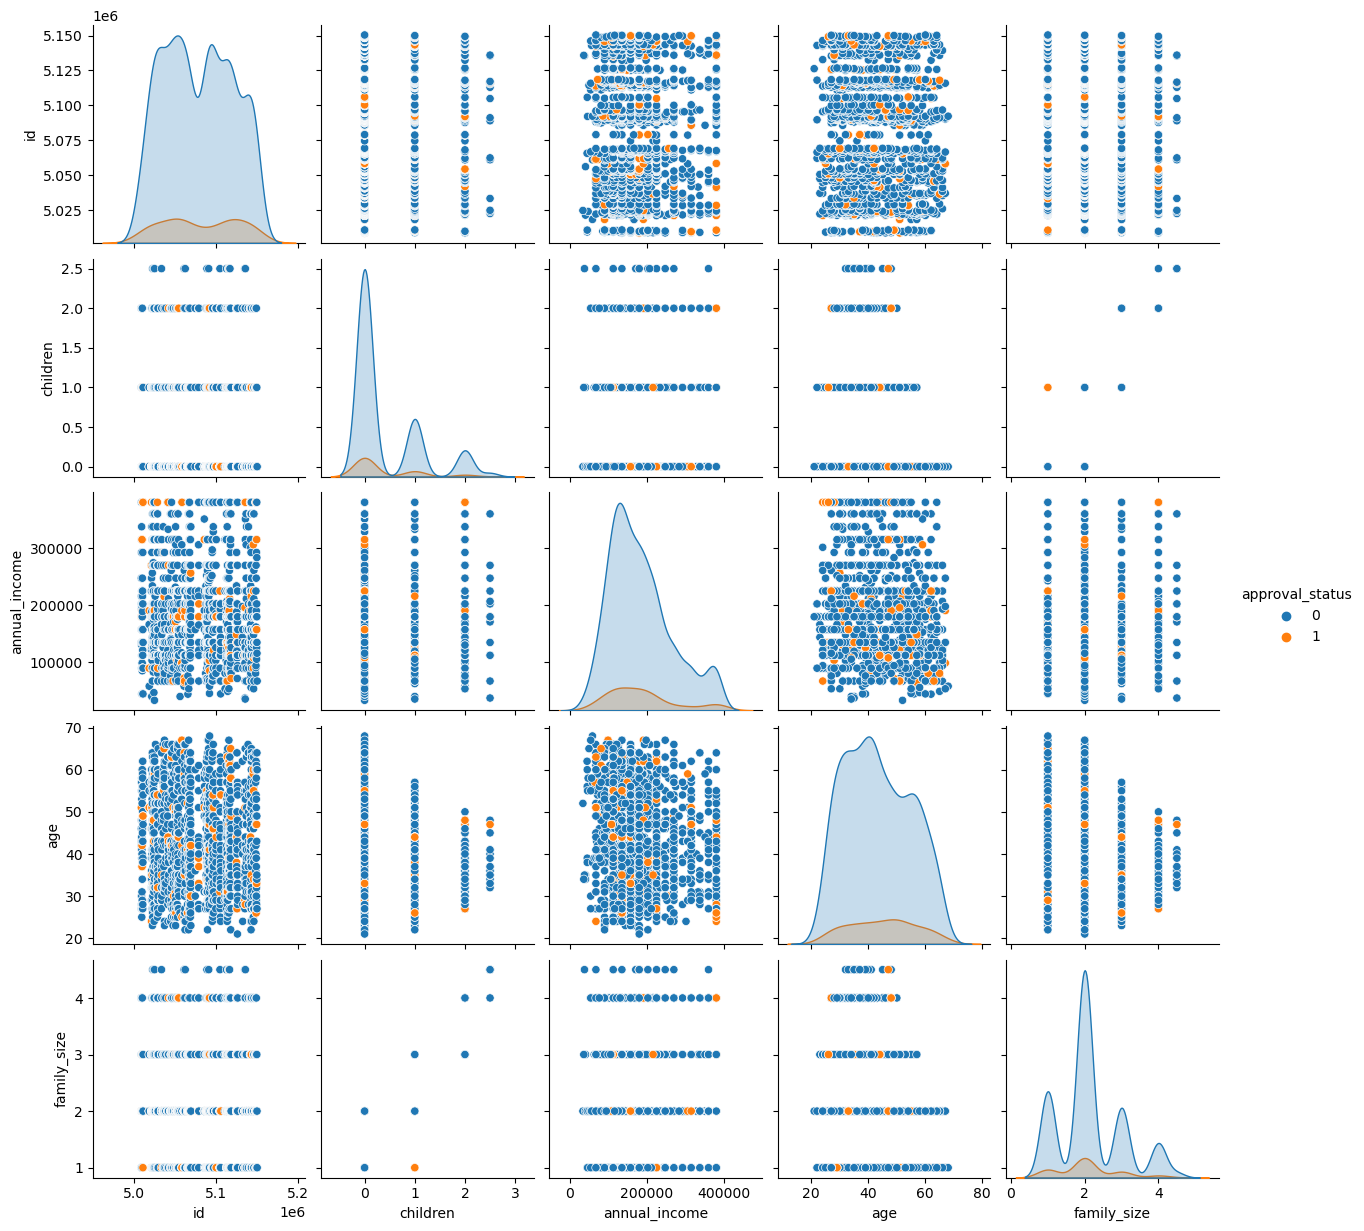

In [35]:
sns.pairplot(df, hue= "approval_status");

-------------------------------
employed_status and approval_status:
approval_status     0    1   All
employed_status                 
Employed         1145  136  1281
Unemployed        226   34   260
All              1371  170  1541
-------------------------------



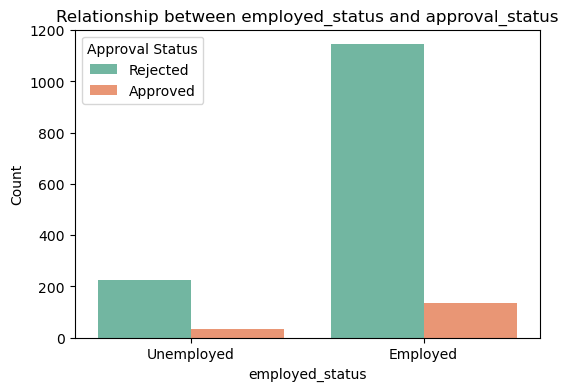

Proportions by Category:

Employed:
  0: 83.52%
  1: 80.00%

Unemployed:
  0: 16.48%
  1: 20.00%


In [36]:
def visualize_column_approval(df, category_col, approval_col='approval_status', palette='Set2'):
  
    # Generate crosstab
    crosstab = pd.crosstab(df[category_col], df[approval_col], margins=True)
    print("-------------------------------")
    print(f"{category_col} and {approval_col}:")
    print(crosstab)
    print("-------------------------------\n")

    # Plot countplot
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=category_col, hue=approval_col, palette=palette)
    plt.title(f"Relationship between {category_col} and {approval_col}")
    plt.xlabel(category_col)
    plt.ylabel("Count")
    #plt.legend(title='Approval Status', labels=df[approval_col].unique())
    plt.legend(title='Approval Status', labels=['Rejected', 'Approved'])

    plt.xticks(rotation=0)
    plt.show()

    # Calculate and print proportions
    print("Proportions by Category:")
    
    # Calculate proportions
    proportions = crosstab.div(crosstab.loc['All'], axis=1).fillna(0) * 100
    
    # Print proportions
    for category in crosstab.index[:-1]:  # Exclude 'All' row
        print(f"\n{category}:")
        for approval_status in crosstab.columns[:-1]:  # Exclude 'All' column
            prop = proportions.loc[category, approval_status]
            print(f"  {approval_status}: {prop:.2f}%")

# Example usage
# df should be a pandas DataFrame with relevant data
visualize_column_approval(df, category_col="employed_status", approval_col='approval_status', palette='Set2')


-------------------------------
gender and approval_status:
approval_status     0    1   All
gender                          
F                 878   95   973
M                 493   75   568
All              1371  170  1541
-------------------------------



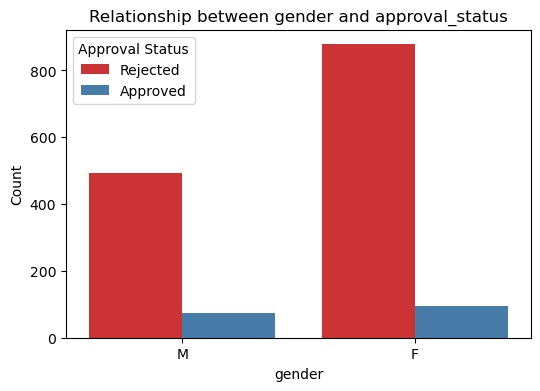

Proportions by Category:

F:
  0: 64.04%
  1: 55.88%

M:
  0: 35.96%
  1: 44.12%


In [37]:
visualize_column_approval(df, category_col="gender", approval_col='approval_status', palette='Set1')

-------------------------------
car_owner and approval_status:
approval_status     0    1   All
car_owner                       
N                 816  106   922
Y                 555   64   619
All              1371  170  1541
-------------------------------



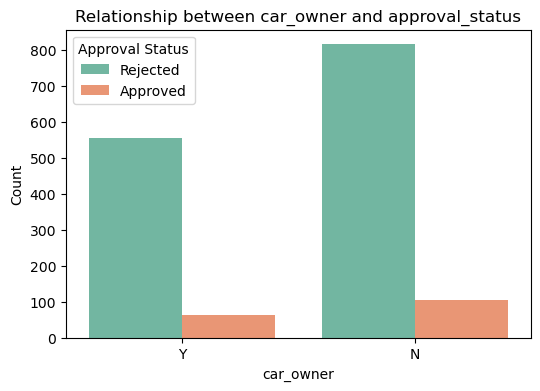

Proportions by Category:

N:
  0: 59.52%
  1: 62.35%

Y:
  0: 40.48%
  1: 37.65%


In [38]:
visualize_column_approval(df, category_col="car_owner", approval_col='approval_status', palette='Set2')


-------------------------------
propert_owner and approval_status:
approval_status     0    1   All
propert_owner                   
N                 472   62   534
Y                 899  108  1007
All              1371  170  1541
-------------------------------



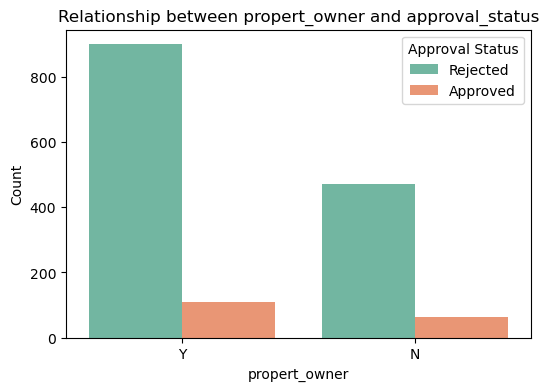

Proportions by Category:

N:
  0: 34.43%
  1: 36.47%

Y:
  0: 65.57%
  1: 63.53%


In [39]:
visualize_column_approval(df, category_col="propert_owner", approval_col='approval_status', palette='Set2')

-------------------------------
marital_status and approval_status:
approval_status     0    1   All
marital_status                  
Married          1031  114  1145
Separated          82   13    95
Unmarried         191   35   226
Widow              67    8    75
All              1371  170  1541
-------------------------------



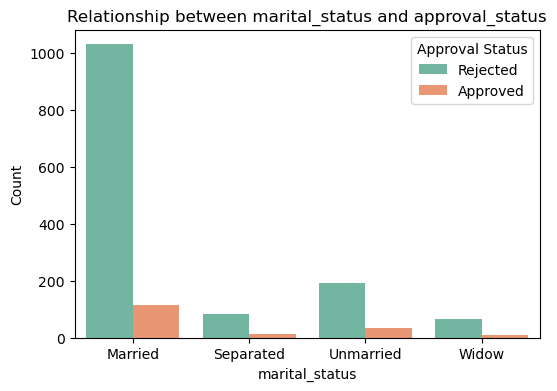

Proportions by Category:

Married:
  0: 75.20%
  1: 67.06%

Separated:
  0: 5.98%
  1: 7.65%

Unmarried:
  0: 13.93%
  1: 20.59%

Widow:
  0: 4.89%
  1: 4.71%


In [40]:
visualize_column_approval(df, category_col="marital_status", approval_col='approval_status', palette='Set2')


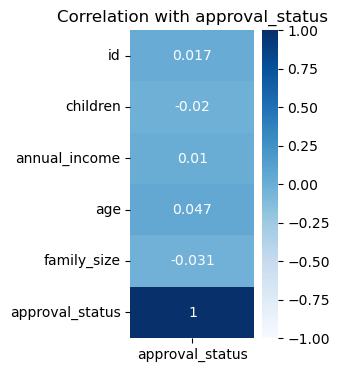

In [41]:
def plot_target_correlation_heatmap(df, target_variable):
    df_numeric = df.select_dtypes(include=[np.number])
    df_corr_target = df_numeric.corr()
    
    plt.figure(figsize=(2, 4))
    sns.heatmap(df_corr_target[[target_variable]], annot=True, vmin=-1, vmax=1, cmap="Blues")
    plt.title(f'Correlation with {target_variable}')
    plt.show()
plot_target_correlation_heatmap(df, 'approval_status')

In [42]:
df.drop(columns=['id','type_income'], inplace=True, axis=1) # These variables are not necessary

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 1547
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           1541 non-null   object 
 1   car_owner        1541 non-null   object 
 2   propert_owner    1541 non-null   object 
 3   children         1541 non-null   float64
 4   annual_income    1541 non-null   int64  
 5   education        1541 non-null   object 
 6   marital_status   1541 non-null   object 
 7   housing_type     1541 non-null   object 
 8   age              1541 non-null   int64  
 9   employed_status  1541 non-null   object 
 10  family_size      1541 non-null   float64
 11  approval_status  1541 non-null   int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 188.8+ KB


# <font color= blue > <b> Feature Encoding </b><font color= #FF0000>


In [44]:
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()

In [45]:
df['gender']=e.fit_transform(df['gender'])
df['car_owner']=e.fit_transform(df['car_owner'])
df['propert_owner']=e.fit_transform(df['propert_owner'])
df['education']=e.fit_transform(df['education'])
df['marital_status']=e.fit_transform(df['marital_status'])
df['housing_type']=e.fit_transform(df['housing_type'])
df['employed_status']=e.fit_transform(df['employed_status'])

In [46]:
# Features: All columns except the last one
X = df.iloc[:, :-1]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 1547
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           1541 non-null   int32  
 1   car_owner        1541 non-null   int32  
 2   propert_owner    1541 non-null   int32  
 3   children         1541 non-null   float64
 4   annual_income    1541 non-null   int64  
 5   education        1541 non-null   int32  
 6   marital_status   1541 non-null   int32  
 7   housing_type     1541 non-null   int32  
 8   age              1541 non-null   int64  
 9   employed_status  1541 non-null   int32  
 10  family_size      1541 non-null   float64
dtypes: float64(2), int32(7), int64(2)
memory usage: 134.6 KB


In [47]:
# Target: The last column
y = df.iloc[:, -1]
y

0       1
1       0
2       0
3       0
4       0
       ..
1543    0
1544    0
1545    0
1546    0
1547    0
Name: approval_status, Length: 1541, dtype: int64

# <font color= blue > <b> Treating Imbalance in dataset </b><font color= #FF0000>


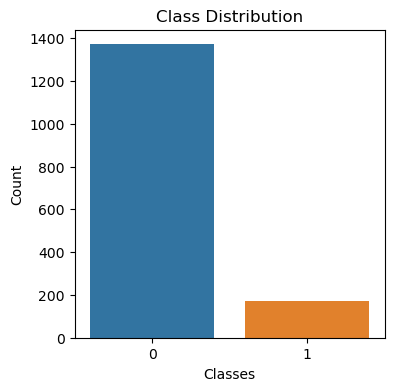

0    1371
1     170
Name: approval_status, dtype: int64


In [48]:
# Count the occurrences of each class
class_distribution = y.value_counts()
# Visualize the class distribution
plt.figure(figsize=(4, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()
print(class_distribution)

In [49]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X, y = oversampler.fit_resample(X, y)

# <font color= blue > <b> Splitting Train and Test data </b><font color= #FF0000>


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train.shape)
print(X_test.shape)

(2193, 11)
(549, 11)


In [51]:
bf_stan_train = X_train.copy()
bf_stan_train

,gender,car_owner,propert_owner,children,annual_income,education,marital_status,housing_type,age,employed_status,family_size
2639,1,1,1,0.0,292500,1,0,1,57,0,2.0
452,0,1,1,1.0,157500,2,0,1,35,0,3.0
1448,0,0,1,0.0,180000,4,2,1,64,1,1.0
196,0,0,1,0.0,190796,4,0,1,59,1,2.0
1642,1,0,0,0.0,380250,1,0,1,54,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
960,0,0,1,0.0,315000,4,3,1,62,1,1.0
905,0,0,0,0.0,135000,4,0,5,33,0,2.0
1096,1,1,1,0.0,135000,1,0,1,48,0,2.0
235,1,1,1,1.0,157500,4,0,1,37,0,3.0


In [52]:
bf_stan_test = X_test.copy()
bf_stan_test

,gender,car_owner,propert_owner,children,annual_income,education,marital_status,housing_type,age,employed_status,family_size
2501,0,1,1,0.0,90000,4,0,1,51,0,2.0
1028,0,0,1,2.0,180000,4,0,1,35,0,4.0
558,0,0,0,2.0,180000,4,2,1,45,0,4.0
1438,0,1,1,1.0,380250,1,2,1,27,0,2.0
428,0,0,0,0.0,90000,4,0,1,23,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
1239,1,1,0,0.0,225000,4,0,3,57,0,2.0
918,0,1,1,0.0,243000,4,2,1,40,0,1.0
1506,0,1,1,0.0,94500,4,0,1,49,0,2.0
785,0,0,0,0.0,112500,2,0,1,27,0,2.0


## Standardizing the X train and X test

In [53]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are DataFrames
sc = StandardScaler()

# Fit and transform the training data
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

# Transform the testing data
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns, index=X_test.index)


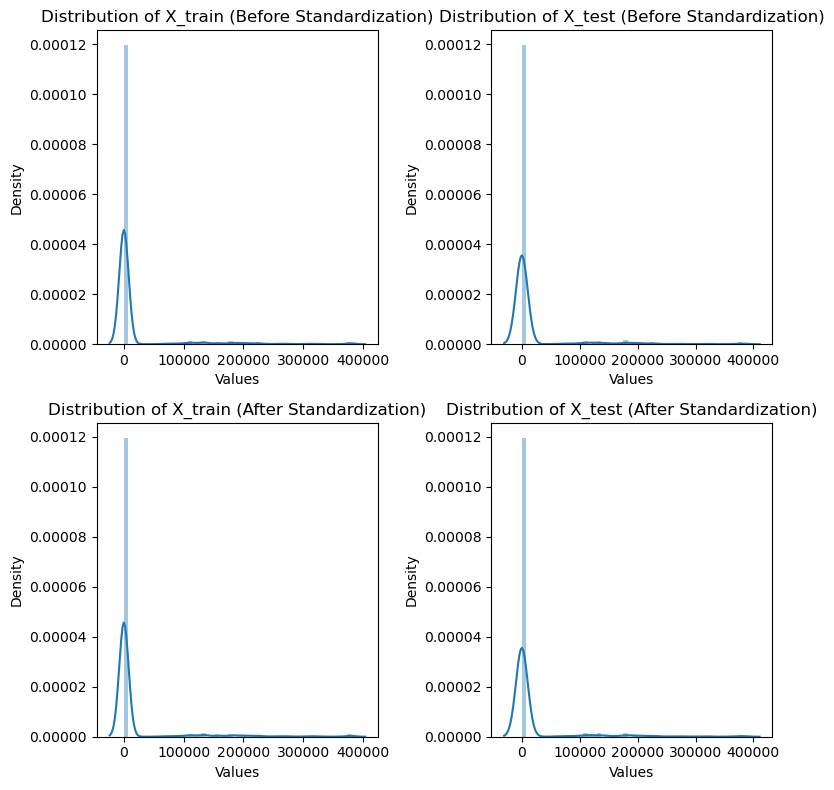

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two rows and two columns
fig, axes = plt.subplots(2, 2, figsize=(8,8))

# Before Standardization: Plot the distribution of X_train
sns.distplot(bf_stan_train, kde=True, ax=axes[0, 0])
axes[0, 0].set_xlabel('Values')
axes[0, 0].set_ylabel('Density')
axes[0, 0].set_title('Distribution of X_train (Before Standardization)')

# Before Standardization: Plot the distribution of X_test
sns.distplot(bf_stan_test, kde=True, ax=axes[0, 1])
axes[0, 1].set_xlabel('Values')
axes[0, 1].set_ylabel('Density')
axes[0, 1].set_title('Distribution of X_test (Before Standardization)')

# After Standardization: Plot the distribution of X_train
sns.distplot(X_train, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Values')
axes[1, 0].set_ylabel('Density')
axes[1, 0].set_title('Distribution of X_train (After Standardization)')

# After Standardization: Plot the distribution of X_test
sns.distplot(X_test, kde=True, ax=axes[1, 1])
axes[1, 1].set_xlabel('Values')
axes[1, 1].set_ylabel('Density')
axes[1, 1].set_title('Distribution of X_test (After Standardization)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# <font color= blue > <b> Initialize the Models </b><font color= #FF0000>



In [55]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Dictionary to store accuracy results
model_accuracies = {}

# Train each model, make predictions, and calculate accuracy
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.2f}\n")
    
    # Additional evaluation (optional)
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    try:
        print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred):.2f}")
    except ValueError:
        print("ROC-AUC Score is not available for this model.")
    print("="*50)



Logistic Regression Accuracy: 0.49

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       280
           1       0.49      1.00      0.66       269

    accuracy                           0.49       549
   macro avg       0.24      0.50      0.33       549
weighted avg       0.24      0.49      0.32       549

Confusion Matrix:
[[  0 280]
 [  0 269]]
ROC-AUC Score: 0.50
Decision Tree Accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.94       280
           1       0.91      0.97      0.94       269

    accuracy                           0.94       549
   macro avg       0.94      0.94      0.94       549
weighted avg       0.94      0.94      0.94       549

Confusion Matrix:
[[253  27]
 [  8 261]]
ROC-AUC Score: 0.94
Random Forest Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

    

## Here's a concise summary of the model performances:

1. **Random Forest**: Best overall with 97% accuracy, high precision, recall, and F1-scores. ROC-AUC score of 0.97 indicates excellent performance.


2. **Decision Tree**: Strong performer with 94% accuracy and balanced metrics for both classes. ROC-AUC score of 0.94.


3. **SVM**: Poor performance with 53% accuracy. Precision, recall, and F1-scores are lower compared to the other models. ROC-AUC score of 0.53.


4. **Logistic Regression**: Worst performer with 49% accuracy and poor results for class 0. ROC-AUC score of 0.50 indicates it’s nearly as good as random guessing.

**Recommendation**: Use the Random Forest model for the best performance.

In summary, the Random Forest model stands out as the most effective for predicting credit card approval. It achieves the highest accuracy and precision and maintains a strong balance between precision and recall for both approved and non-approved applications. Given these performance metrics, the Random Forest model is the recommended choice for this prediction task based on the data provided.

<div style="text-align: center; padding: 30px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; background-color: #ffffff; border-radius: 12px; border: 1px solid #e1e1e1; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); max-width: 600px; margin: auto;">
  <p style="font-size: 20px; color: #333; margin: 0 0 10px;">
  </p>
 
  <div>
    <a href="https://www.linkedin.com/in/nirmalcv/" style="color: #0077b5; text-decoration: none; font-weight: bold; margin: 0 15px; font-size: 18px;">LinkedIn</a> | 
    <a href="https://github.com/Nirmal-Sarkar" style="color: #333; text-decoration: none; font-weight: bold; margin: 0 15px; font-size: 18px;">GitHub</a>
  </div>
</div>

<div style="padding:15px;color:white;margin:0;font-size:200%;font-family:Arial, sans-serif;text-align:center;display:block;border-radius:15px;background-color: #003366;letter-spacing:2px;box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <b>THANK YOU</b>
</div>

